# Wordclouds - Rudimentary visualizations

In [1]:
# configure; define some constants
FILE     = './carrels/williamPenn-from-freebo/etc/reader.txt'
LANGUAGE = 'english'
HEIGHT   = 960
WIDTH    = 1280
COLOR    = 'white'


In [2]:
# require
from nltk import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [3]:
# initialize
stopwords = set( corpus.stopwords.words( LANGUAGE ) ) 

In [4]:
# open the given file and read it
data = open( FILE ).read()

# create a list of all the tokens (words, punctuation, etc) in the data
tokens      = word_tokenize( data )
tokens      = [ token.lower() for token in tokens if token.isalpha() ]
tokens      = [ token for token in tokens if token not in stopwords ] 
frequencies = FreqDist( tokens )


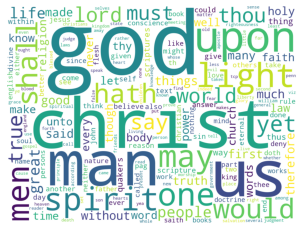

In [5]:
# initialilze a word cloud,...
wordcloud = WordCloud( width=WIDTH, height=HEIGHT, background_color=COLOR )

# ...render it, and display it
plt.imshow( wordcloud.generate_from_frequencies( frequencies ) ) 
plt.axis( "off" ) 
plt.show()


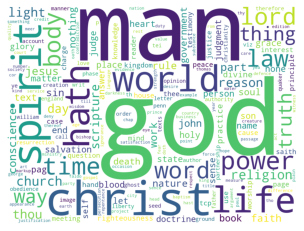

In [6]:
# denote a part-of-speech tag, and output all words with that tag; initialize
P      = 'NN'
tags   = pos_tag( tokens )
tokens = {}

# process each tag
for tag in tags :
    
    # check for given part of speech
    if ( tag[ 1 ] == P ) :
    
        # update the list of pos tags
        if tag[ 0 ] in tokens : tokens[ tag[ 0 ] ] += 1
        else : tokens[ tag[ 0 ] ] = 1

# initialilze a word cloud,...
wordcloud = WordCloud( width = WIDTH, height = HEIGHT, background_color = COLOR )

# ...render it, and display it
plt.imshow( wordcloud.generate_from_frequencies( tokens ) ) 
plt.axis( "off" ) 
plt.show()


In [7]:
# read the given file, tokenize its words, and normalize them
data        = open( FILE ).read()
tokens      = word_tokenize( data )
tokens      = [ token.lower() for token in tokens if token.isalpha() ]
tokens      = [ token for token in tokens if token not in stopwords ] 
frequencies = FreqDist( tokens ).values()



In [8]:
# calculate mean (average), variance, and standard deviation
mean        = sum( frequencies ) / len( frequencies )
variance    = sum( ( frequency-mean )**2 for frequency in frequencies ) / len(frequencies)
deviation   = variance**0.5
print( "mean: %f; variance: %f; deviation: %f" % ( mean, variance, deviation ) )

mean: 24.967357; variance: 26041.201869; deviation: 161.372866


In [9]:
# create a list of second-teir "interesting" words

# initialize
frequencies = FreqDist( tokens )
n           = round( mean + deviation )
interesting = {}

# loop through each token in the frequencies
for token in frequencies :

        # parse
        count = frequencies[ token ]
        
        # update, optionally
        if ( mean <= count <= n ) : interesting[ token ] = count

# output
print( interesting )

{'richard': 186, 'prisoner': 186, 'takes': 186, 'generally': 186, 'sons': 186, 'speaks': 186, 'thinks': 185, 'pages': 184, 'tender': 184, 'st': 184, 'gods': 184, 'israel': 184, 'brother': 184, 'dispensation': 184, 'infinite': 183, 'betwixt': 183, 'popery': 183, 'condemn': 183, 'desired': 182, 'remains': 182, 'knowing': 182, 'surely': 182, 'consideration': 181, 'opposed': 181, 'greatly': 181, 'six': 181, 'blind': 181, 'really': 181, 'wrought': 181, 'opposition': 181, 'paper': 181, 'commands': 181, 'humane': 180, 'supper': 180, 'sanctification': 180, 'variety': 179, 'satan': 179, 'keith': 179, 'actions': 178, 'divinity': 178, 'council': 178, 'wait': 178, 'forever': 178, 'child': 177, 'dyed': 177, 'became': 177, 'professors': 177, 'capiendo': 176, 'change': 176, 'regard': 176, 'worthy': 176, 'maintain': 175, 'latter': 175, 'holiness': 175, 'remember': 175, 'joy': 175, 'mistake': 175, 'mention': 175, 'folly': 175, 'family': 174, 'using': 173, 'carried': 173, 'five': 173, 'manifested': 173,

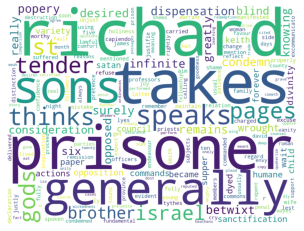

In [10]:
# initialilze a word cloud,...
wordcloud = WordCloud( width = WIDTH, height = HEIGHT, background_color = COLOR )

# ...render it, and display it
plt.imshow( wordcloud.generate_from_frequencies( interesting ) ) 
plt.axis( "off" ) 
plt.show()

